

*   NAME- PIYUSH HAMBARDE
*   ROLL NUMBER - B21CH022
*   ASSIGNMENT-1






In [ ]:
import numpy as np
import pandas as pd

In [ ]:
#Imports
import torch
import torch.nn as nn #Has all the NN models
import torch.optim as optim # adam,SGD
import torch.nn.functional as F #Activation functions
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
#Create RNN
class RNN(nn.Module):
  def __init__(self):
    super(RNN, self).__init__()
    self.rnn = nn.RNN(input_size = 2,hidden_size = 64,num_layers =1 , batch_first=True)
    self.fc = nn.Linear(64,2)

  def forward(self, x):

    #Forward Propagation
    x = x.view(x.size(0), -1, x.size(1))
    out, _ = self.rnn(x)
    out = self.fc(out[:,-1,:])
    return out

In [ ]:
#Hyperparameters
input_size = 2 #Number of input features i.e., V1 and V2
num_layers = 1
hidden_size = 64
num_classes= 2 # NUmber of output features i.e., y1 and y2
learning_rate = 0.01


DATA HANDLING

In [ ]:
#Load Data
test = pd.read_csv(r'/content/Testing_data.csv')
train = pd.read_csv(r'/content/Training_data.csv')


In [ ]:
x_train = train.iloc[:,1:3]
y_train = train.iloc[:,3:5]
x = x_train.to_numpy()
y = y_train.to_numpy()


In [ ]:
X_train = torch.tensor(x, dtype=torch.float32).to(device)
Y_train = torch.tensor(y,dtype=torch.float32).to(device)


In [ ]:
x_test = test.iloc[:,1:3]
y_test = test.iloc[:,3:5]
xt = x_test.to_numpy()
yt = y_test.to_numpy()

In [ ]:
X_test = torch.tensor(xt,dtype=torch.float32).to(device)
Y_test = torch.tensor(yt, dtype=torch.float32).to(device)

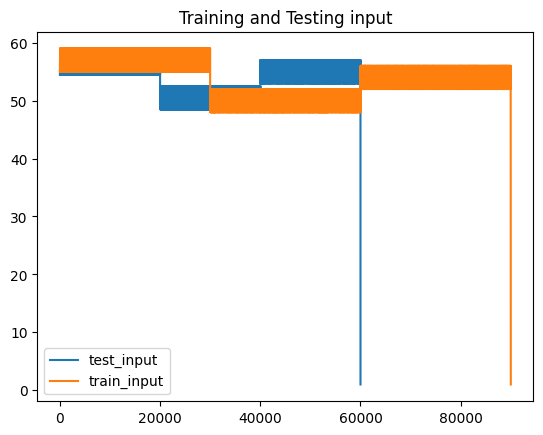

In [ ]:
plt.plot(x_test['V1'], label='test_input')
plt.plot(x_train['V1'], label = 'train_input')
plt.title("Training and Testing input")
plt.legend()
plt.show()


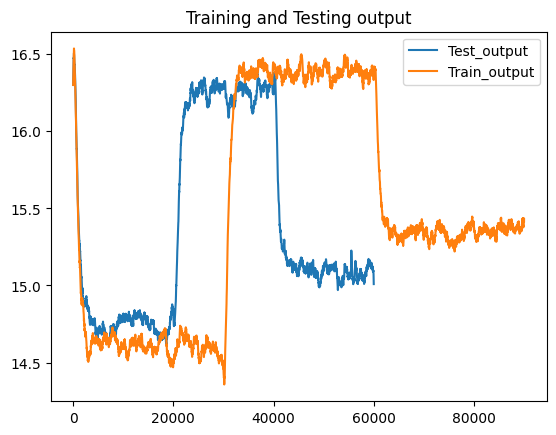

In [ ]:
plt.plot(y_test['y1'], label='Test_output')
plt.plot(y_train['y1'], label = 'Train_output')
plt.title("Training and Testing output")
plt.legend()
plt.show()

TRAINING THE RNN MODEL FOR THE DATA


In [ ]:
#Initialize network
rnn=RNN()
rnn = rnn.to(device)

In [ ]:
#Loss and Optimizer
criterion = nn.L1Loss()
optimizer = optim.Adam(rnn.parameters(), lr = learning_rate)
print(device)

cuda


In [ ]:
#Train Newtork
num_epochs = 100
for epoch in range(num_epochs):
  rnn.train()
  outputs = rnn(X_train)
  loss = criterion(outputs,Y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  rnn.eval()
  test_outputs = rnn(X_test)
  test_loss = criterion(test_outputs,Y_test)

  print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item(): .4f}, Test Loss: {test_loss.item(): .4f}')


Epoch [1/100], Train Loss:  15.4116, Test Loss:  14.5367
Epoch [2/100], Train Loss:  14.5378, Test Loss:  13.7502
Epoch [3/100], Train Loss:  13.7531, Test Loss:  13.0162
Epoch [4/100], Train Loss:  13.0213, Test Loss:  12.3676
Epoch [5/100], Train Loss:  12.3730, Test Loss:  11.7792
Epoch [6/100], Train Loss:  11.7842, Test Loss:  11.2012
Epoch [7/100], Train Loss:  11.2063, Test Loss:  10.6171
Epoch [8/100], Train Loss:  10.6223, Test Loss:  10.0187
Epoch [9/100], Train Loss:  10.0240, Test Loss:  9.4185
Epoch [10/100], Train Loss:  9.4240, Test Loss:  8.8328
Epoch [11/100], Train Loss:  8.8381, Test Loss:  8.2467
Epoch [12/100], Train Loss:  8.2520, Test Loss:  7.6443
Epoch [13/100], Train Loss:  7.6498, Test Loss:  7.0251
Epoch [14/100], Train Loss:  7.0309, Test Loss:  6.3962
Epoch [15/100], Train Loss:  6.4020, Test Loss:  5.7670
Epoch [16/100], Train Loss:  5.7723, Test Loss:  5.1384
Epoch [17/100], Train Loss:  5.1436, Test Loss:  4.5076
Epoch [18/100], Train Loss:  4.5126, Tes

In [ ]:
rnn.eval()
with torch.no_grad():
    prediction = rnn(X_test).cpu().numpy()

targets = Y_test.cpu().numpy()
mse = mean_squared_error(targets, prediction)
mae = mean_absolute_error(targets, prediction)
r2 = r2_score(targets, prediction)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-squared (R2): {r2:.4f}')

Mean Squared Error (MSE): 0.3757
Mean Absolute Error (MAE): 0.5443
R-squared (R2): -0.0089


**RESULTS AND DISCUSSION**




1.   The MAE(Mean Absolute Error) for SimpleRNN comes out to be 0.5443, which means that on average the variables y1 and y2 predicted by the model(SimpleRNN here) are close to one another, and are off by an value of 0.5443 on an average.
2.  Generally a low MAE value is desirable. It signifies that the model is capturing the underlying patterns in the data well and is able to predict with an high accuracy.

3.  This basically tells us that the model can be used to predict the target variables i.e., h1 and h2 given the conditions of the valve at a particular time instance.

*LSTM*

In [ ]:
class LSTM(nn.Module):
  def __init__(self, input_size, hidden_size , num_layers, num_classes):
    super(LSTM, self).__init__()
    self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first = True)
    self.fc = nn.Linear(hidden_size, num_classes)

  def forward(self,x):
    x = x.view(x.size(0), -1, x.size(1))
    out,_ = self.lstm(x)
    out = self.fc(out[:,-1,:])
    return out

In [ ]:
lstm = LSTM(input_size, hidden_size , num_layers, num_classes).to(device)
criterion = nn.L1Loss()
optimizer = optim.Adam(lstm.parameters(), lr = learning_rate)

In [ ]:
for epoch in range(num_epochs):
  lstm.train()
  output = lstm(X_train)
  loss = criterion(output, Y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  lstm.eval()
  test_outputs = lstm(X_test)
  test_loss = criterion(test_outputs,Y_test)

  print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {loss.item(): .4f}, Test Loss: {test_loss.item(): .4f}')

Epoch [1/100], Train Loss:  15.0594, Test Loss:  14.7394
Epoch [2/100], Train Loss:  14.7456, Test Loss:  14.4634
Epoch [3/100], Train Loss:  14.4693, Test Loss:  14.1814
Epoch [4/100], Train Loss:  14.1873, Test Loss:  13.8899
Epoch [5/100], Train Loss:  13.8968, Test Loss:  13.6118
Epoch [6/100], Train Loss:  13.6187, Test Loss:  13.3359
Epoch [7/100], Train Loss:  13.3419, Test Loss:  13.0413
Epoch [8/100], Train Loss:  13.0465, Test Loss:  12.7149
Epoch [9/100], Train Loss:  12.7199, Test Loss:  12.3558
Epoch [10/100], Train Loss:  12.3607, Test Loss:  11.9760
Epoch [11/100], Train Loss:  11.9809, Test Loss:  11.5960
Epoch [12/100], Train Loss:  11.6006, Test Loss:  11.2323
Epoch [13/100], Train Loss:  11.2368, Test Loss:  10.8894
Epoch [14/100], Train Loss:  10.8941, Test Loss:  10.5596
Epoch [15/100], Train Loss:  10.5646, Test Loss:  10.2274
Epoch [16/100], Train Loss:  10.2326, Test Loss:  9.8769
Epoch [17/100], Train Loss:  9.8822, Test Loss:  9.4982
Epoch [18/100], Train Loss

In [ ]:
lstm.eval()
with torch.no_grad():
    prediction = lstm(X_test).cpu().numpy()

targets = Y_test.cpu().numpy()
mse = mean_squared_error(targets, prediction)
mae = mean_absolute_error(targets, prediction)
r2 = r2_score(targets, prediction)

print(f'Mean Squared Error (MSE): {mse:.4f}')
print(f'Mean Absolute Error (MAE): {mae:.4f}')
print(f'R-squared (R2): {r2:.4f}')

Mean Squared Error (MSE): 0.3766
Mean Absolute Error (MAE): 0.5516
R-squared (R2): -0.0111


**RESULTS AND DISCUSSIONS FOR PART B**

SimpleRNN MAE value = 0.5443

LSTM MAE value = 0.5516

We got a nearly same value of the MAE for both the models so we can conclude the following things from this:

1. If the accuracies or errors are nearly comparable we can conclude that RNN model might be a better option than a LSTM model as it computationally more efficient.  
2. We conclude that the dataset is limited and has simple patterns which can be predicted by RNN.



*PART C*

In [ ]:
def rnn_models(X_train,Y_train,X_test,Y_test,rnn_type = 1):
  x1 = X_train[:30000]
  x2 = X_train[30000:60000]
  x3 = X_train[60000:]
  y1 = Y_train[:30000]
  y2 = Y_train[30000:60000]
  y3 = Y_train[60000:]
  x1t = X_test[:20000]
  y1t = Y_test[:20000]
  x2t = X_test[20000:40000]
  y2t = Y_test[20000:40000]
  x3t = X_test[40000:]
  y3t = Y_test[40000:]
  if rnn_type == 1:
    num_loss = float('inf')
    rnn1 = RNN().to(device)
    num_epochs = 100
    optimizer = optim.Adam(rnn1.parameters(), lr = learning_rate)
    ep = 0
    for epoch in range(num_epochs):
      rnn1.train()
      outputs = rnn1(x1)
      loss = criterion(outputs,y1)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      rnn1.eval()
      val_outputs = rnn1(x1t)
      val_loss = criterion(val_outputs,y1t)

      if val_loss < num_loss:
        num_loss = val_loss
        ep = epoch
    print(f"For Model {rnn_type} at epoch {ep} the minimum loss found is {num_loss}")
  elif rnn_type == 2:
    num_loss = float('inf')
    rnn2 = RNN().to(device)
    num_epochs = 100
    optimizer = optim.Adam(rnn2.parameters(), lr = learning_rate)
    ep = 0
    for epoch in range(num_epochs):
      rnn2.train()
      outputs = rnn2(x2)
      loss = criterion(outputs,y2)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      rnn2.eval()
      val_outputs = rnn2(x2t)
      val_loss = criterion(val_outputs,y2t)

      if val_loss < num_loss:
        num_loss = val_loss
        ep = epoch
    print(f"For Model {rnn_type} at epoch {ep} the minimum loss found is {num_loss}")
  elif rnn_type == 3:
    num_loss = float('inf')
    rnn3 = RNN().to(device)
    num_epochs = 100
    optimizer = optim.Adam(rnn3.parameters(), lr = learning_rate)
    ep = 0
    for epoch in range(num_epochs):
      rnn3.train()
      outputs = rnn3(x3)
      loss = criterion(outputs,y3)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      rnn3.eval()
      val_outputs = rnn3(x3t)
      val_loss = criterion(val_outputs,y3t)

      if val_loss < num_loss:
        num_loss = val_loss
        ep = epoch
    print(f"For Model {rnn_type} at epoch {ep} the minimum loss found is {num_loss}")
for i in range(1,4):
  rnn_models(X_train,Y_train,X_test,Y_test,i)

For Model 1 at epoch 66 the minimum loss found is 0.1420993059873581
For Model 2 at epoch 57 the minimum loss found is 0.13728472590446472
For Model 3 at epoch 45 the minimum loss found is 0.13565777242183685


In [ ]:
def lstm_models(X_train,Y_train,X_test,Y_test,lstm_type = 1):
  x1 = X_train[:30000]
  x2 = X_train[30000:60000]
  x3 = X_train[60000:]
  y1 = Y_train[:30000]
  y2 = Y_train[30000:60000]
  y3 = Y_train[60000:]
  x1t = X_test[:20000]
  y1t = Y_test[:20000]
  x2t = X_test[20000:40000]
  y2t = Y_test[20000:40000]
  x3t = X_test[40000:]
  y3t = Y_test[40000:]
  global input_size,hidden_size,num_layers,num_classes
  if lstm_type == 1:
    num_loss = float('inf')
    lstm1 = LSTM(input_size,hidden_size,num_layers,num_classes).to(device)
    num_epochs = 100
    optimizer = optim.Adam(lstm1.parameters(), lr = learning_rate)
    ep = 0
    for epoch in range(num_epochs):
      lstm1.train()
      outputs = lstm1(x1)
      loss = criterion(outputs,y1)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      lstm1.eval()
      val_outputs = lstm1(x1t)
      val_loss = criterion(val_outputs,y1t)

      if val_loss < num_loss:
        num_loss = val_loss
        ep = epoch
    print(f"For Model {lstm_type} at epoch {ep} the minimum loss found is {num_loss}")
  elif lstm_type == 2:
    num_loss = float('inf')
    lstm2 = LSTM(input_size,hidden_size,num_layers,num_classes).to(device)
    num_epochs = 100
    optimizer = optim.Adam(lstm2.parameters(), lr = learning_rate)
    ep = 0
    for epoch in range(num_epochs):
      lstm2.train()
      outputs = lstm2(x2)
      loss = criterion(outputs,y2)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      lstm2.eval()
      val_outputs = lstm2(x2t)
      val_loss = criterion(val_outputs,y2t)

      if val_loss < num_loss:
        num_loss = val_loss
        ep = epoch
    print(f"For Model {lstm_type} at epoch {ep} the minimum loss found is {num_loss}")
  elif lstm_type == 3:
    num_loss = float('inf')
    lstm3 = LSTM(input_size,hidden_size,num_layers,num_classes).to(device)
    num_epochs = 100
    optimizer = optim.Adam(lstm3.parameters(), lr = learning_rate)
    ep = 0
    for epoch in range(num_epochs):
      lstm3.train()
      outputs = lstm3(x3)
      loss = criterion(outputs,y3)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      lstm3.eval()
      val_outputs = lstm3(x3t)
      val_loss = criterion(val_outputs,y3t)

      if val_loss < num_loss:
        num_loss = val_loss
        ep = epoch
    print(f"For Model {lstm_type} at epoch {ep} the minimum loss found is {num_loss}")
for i in range(1,4):
  lstm_models(X_train,Y_train,X_test,Y_test,i)

For Model 1 at epoch 62 the minimum loss found is 0.17056094110012054
For Model 2 at epoch 78 the minimum loss found is 0.12846846878528595
For Model 3 at epoch 79 the minimum loss found is 0.2538486421108246


**RESULTS AND DISCUSSIONS FOR PART C**

In this part we basically split the dataset into 3 regions based on their operating conditions that is the value of V1 and V2 , we observed that the regions vary with the time , so we split it according to the time instances.




*   Next, we modeled the three splitted dataset using 3 RNNS and 3 LSTMS to check for accuracy of the predictions.
*   For the RNN we concluded that the loss is minimum for model 3 at epoch 45 , similar we can conclude that how many epochs are needed for the minimum loss from each model using these 3 model system.





*PART D: THE NEURO-FUZZY MODEL*


Implementation:
1. Firstly , we will define a fuzzy logic i.e, say low, medium or high.This will be based on the region of splitting.
2. We will use a fuzzifier(A function) for converting the splitted data into the 3 fuzzy logics as defined earlier.
3. Then we will also add the inputs in the fuzzy form.
4. We will predict the output which will also be in a fuzzy logic using fuzzy rules.
5. We will use a defuzzifier to get the result in the original format.  